# PriceTrack: Unlocking Car Market Insights

PriceTrack is a data science project designed to predict the valuation of second-hand cars based on key input parameters. 
Leveraging regression model, it provides data-driven insights to help buyers and sellers make informed decisions.

## Exploratory Data Analysis (EDA)

This step helps us understand the data we are dealing with and it's various aspects.

We will be performing univariate analysis and plot some graphs for better understanding.

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv("cleaned_data.csv")
df.head()

,name,company,year,Price,kms_driven,fuel_type,Age,Annual_Km_Driven
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000.0,45000.000000,Petrol,13,3461.538462
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000.0,137671.638942,Diesel,14,9833.688496
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.0,28000.000000,Petrol,6,4666.666667
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000.0,36000.000000,Diesel,6,6000.000000
4,Ford Figo,Ford,2012,175000.0,41000.000000,Diesel,8,5125.000000


### Year-wise sales of car

In [77]:
year_wise_sales = df.groupby('year').size()
year_wise_sales

year
1995      2
2000      7
2001      5
2002      4
2003     13
2004     12
2005     13
2006     22
2007     19
2008     16
2009     54
2010     43
2011     59
2012     74
2013     93
2014     92
2015    111
2016     74
2017     53
2018     30
2019     18
dtype: int64

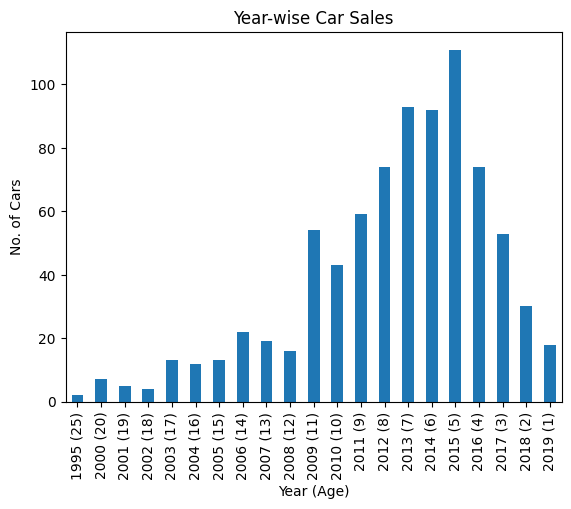

In [78]:
# Year-wise bar chart with frequency as its height
year_wise_sales.plot(kind='bar', xlabel='Year (Age)', ylabel='No. of Cars')

# Calculate age for each year
ages = year_wise_sales.index.max() - year_wise_sales.index + 1
tick_labels = [f"{year} ({age})" for year, age in zip(year_wise_sales.index, ages)]
ax = year_wise_sales.plot(kind='bar', xlabel='Year (Age)', ylabel='No. of Cars', title="Year-wise Car Sales")
ax.set_xticklabels(tick_labels)

# Show the plot
plt.show()

### 📊 Year-wise Car Availability  

- Cars from **2011-2016** are the most common in the resale market, peaking in **2015 (111 cars)**.  
- Older cars (before 2005) have low availability, indicating limited resale.  
- Newer models (2017 onward) show a decline, possibly due to ownership retention.  
- The **4-9 year old** range appears to be the resale sweet spot.  


### Company-wise sale of car

In [79]:
company_wise_sales = df.groupby("company").size().sort_values()
company_wise_sales

company
Land            1
Jeep            1
Volvo           1
Jaguar          2
Hindustan       3
Force           4
Fiat            4
Mercedes        6
Mitsubishi      6
Nissan          6
Datsun          7
BMW             8
Mini            8
Audi           11
Skoda          13
Volkswagen     19
Ford           30
Renault        33
Chevrolet      34
Toyota         36
Honda          60
Tata           65
Mahindra       98
Hyundai       139
Maruti        219
dtype: int64

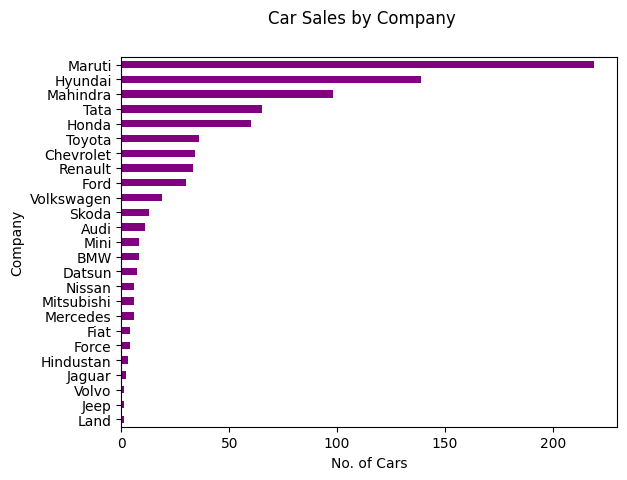

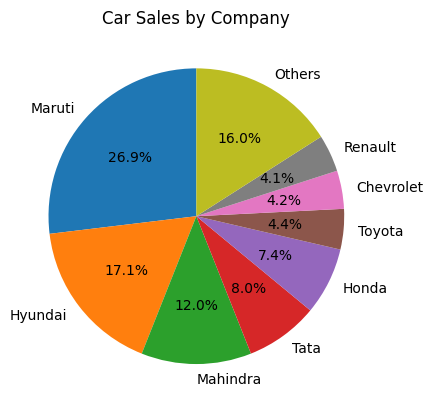

In [80]:
company_wise_sales.plot(
    kind="barh",
    xlabel="No. of Cars",
    ylabel="Company",
    title="Car Sales by Company",
    color="purple",
    subplots=True,
)
plt.show()


# Pie chart for company-wise sales
number_of_companies = 8
company_wise_sales_pie = df.groupby("company").size().sort_values(ascending=False).head(number_of_companies).copy()
company_wise_sales_pie.loc['Others'] = df.groupby("company").size().sort_values(ascending=False).tail(-number_of_companies).sum()
company_wise_sales_pie.plot(kind='pie', autopct='%1.1f%%', startangle=90, title="Car Sales by Company")
plt.show()


### 📊 Car Brand Distribution in the Resale Market

##### **Maruti, Hyundai and Mahindra** combined hold around **56%** of the total resale market

- **Maruti (219 - 26.9%) and Hyundai (139 - 17.1%)** dominate the resale market, reflecting their strong presence and popularity in India.  
- Mid-range brands like **Toyota (36), Chevrolet (34), and Renault (33)** have moderate presence. 
- Luxury brands such as **BMW (8), Audi (11), and Mercedes (6)** have limited resale availability.
- Niche brands like **Jaguar (2), Volvo (1), and Jeep (1)** are the least common in the second-hand market.


The data suggests that **mass-market brands** have a higher resale volume, while **luxury and niche brands** are less frequently resold. 🚗📈  
